In [3]:
import numpy as np
import pandas as pd
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
# from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
amz_df = pd.read_csv("/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv")

In [5]:
amz_df.columns = ['userId', 'productId', 'Rating', 'timestamp']


In [6]:
amz_df.head()

,userId,productId,Rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [7]:
amz_df.shape

(7824481, 4)

In [8]:
amz_sub = amz_df.head(50000)

In [9]:
amz_sub.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [10]:
amz_sub.describe()

,Rating,timestamp
count,50000.00000,5.000000e+04
mean,4.03524,1.205879e+09
std,1.35555,1.688407e+08
min,1.00000,9.127296e+08
25%,4.00000,1.008547e+09
50%,5.00000,1.267834e+09
75%,5.00000,1.362874e+09
max,5.00000,1.405987e+09


In [11]:
amz_sub.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

<Figure size 500x400 with 0 Axes>

Text(0, 0.5, 'Total number of ratings')

Text(0.5, 0, 'Rating')

Text(0.5, 1.0, 'Distribution of Ratings in Electronics Data')

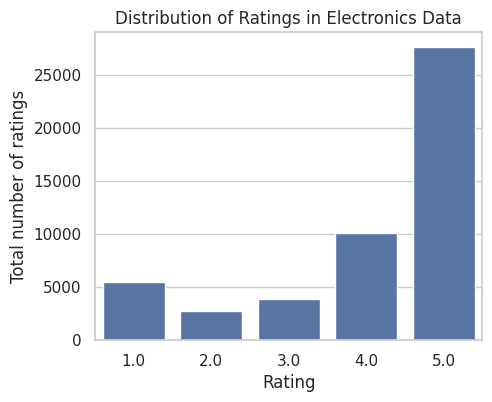

In [12]:

sns.set(style="whitegrid")


plt.figure(figsize=(5, 4))
ax = sns.countplot(x="Rating", data=amz_sub)
ax.set_ylabel("Total number of ratings")
ax.set_xlabel("Rating")
plt.title("Distribution of Ratings in Electronics Data")
plt.show()

In [13]:
unique_users = amz_sub['userId'].nunique()
unique_prod = amz_sub['productId'].nunique()
print("Number of unique users:", unique_users)
print("Number of unique users:", unique_prod)
# this is out of 100,000 we are considering only a subset of the data

Number of unique users: 46554
Number of unique users: 3445


In [14]:
# how many products did each user review
user_ratings_count = amz_sub.groupby('userId').count()['Rating'].sort_values(ascending=False)
print(user_ratings_count)



userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
                  ..
A2AWH1OOMEIA1Q     1
A2AWJVTRURCGX3     1
A2AWLR3N6SOZDJ     1
A2AWP1RAJ2GOGE     1
A2AVV4LX0U104K     1
Name: Rating, Length: 46554, dtype: int64


In [15]:
# Collaberative filtering (Item-Item recommedation)
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3206148 sha256=67e321ee3cb0ba3755deb301c69fab85e6880eb208bdb6047eb59d386361dbb1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [16]:
# from surprise import Dataset, Reader
# from surprise import KNNBasic
# from surprise.model_selection import cross_validate

# # Ensure your DataFrame has three columns: ['userId', 'productId', 'Rating']
# # Convert the DataFrame into a Surprise dataset
# reader = Reader(rating_scale=(amz_sub['Rating'].min(), amz_sub['Rating'].max()))
# data = Dataset.load_from_df(amz_sub[['userId', 'productId', 'Rating']], reader)

# # Use KNNBasic algorithm for user-based collaborative filtering
# sim_options = {
#     'name': 'cosine',
#     'user_based': True  # Compute similarities between users
# }
# algo = KNNBasic(sim_options=sim_options)

# # Perform cross-validation and print results
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


In [17]:
# pip install scikit-surprise
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import cross_validate

from surprise.model_selection import train_test_split


In [18]:
reader = Reader(rating_scale=(amz_sub['Rating'].min(), amz_sub['Rating'].max()))
data = Dataset.load_from_df(amz_sub[['userId', 'productId', 'Rating']], reader)
#Reading the dataset
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(amz_sub,reader)

In [19]:
# Split the dataset
trainset, testset = train_test_split(data, test_size=0.2)

In [20]:
# Train the algorithm
algo = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [21]:
# Make predictions on the test set
predictions = algo.test(testset)

In [22]:
# Function to calculate MAP
from collections import defaultdict
def calculate_map(predictions, threshold=3.5):
    # defaultdict of lists to store predictions
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    # Calculating MAP
    map_score = 0
    user_count = 0
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Calculate average precision
        ap = 0
        relevant_items = 0
        for i, (est, true_r) in enumerate(user_ratings):
            if true_r >= threshold:  # Define your own threshold
                relevant_items += 1
                ap += relevant_items / (i + 1)
        if relevant_items > 0:
            ap /= relevant_items
            map_score += ap
            user_count += 1

    return map_score / user_count if user_count > 0 else 0

In [23]:
# Calculate MAP
map_score = calculate_map(predictions)
print(f"MAP: {map_score}")
# print(map_score)

MAP: 0.9982914423647964


In [24]:
# Perform cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3520  1.3569  1.3594  1.3619  1.3621  1.3585  0.0038  
MAE (testset)     1.0590  1.0663  1.0658  1.0675  1.0693  1.0656  0.0035  
Fit time          64.42   65.70   65.92   64.52   65.52   65.22   0.62    
Test time         0.14    0.15    0.14    0.14    0.14    0.14    0.00    


{'test_rmse': array([1.35197514, 1.35693018, 1.35936013, 1.36192814, 1.36211624]),
 'test_mae': array([1.05895494, 1.06628375, 1.06580437, 1.06752627, 1.06934024]),
 'fit_time': (64.41727995872498,
  65.70192217826843,
  65.92073512077332,
  64.51640796661377,
  65.52082395553589),
 'test_time': (0.1364915370941162,
  0.14685726165771484,
  0.14236712455749512,
  0.14081311225891113,
  0.14157390594482422)}